<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/HG_05_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**5 트리 알고리즘**
============================

5-1. 결정 트리
==================
> 레드 와인과 화이트 와인 표시가 누락된 와인들을 결정트리 알고리즘을 사용하여 분류해 보도록 한다.

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [ ]:
# 데이터프레임 각 열의 데이터 타입과, 누락된 데이터 유무를 확인
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [ ]:
# 각 열에 대한 통계 
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [ ]:
# 판다스 데이터프레임을 넘파이 배열로 변환
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [ ]:
# 입력데이터 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

> ### 설명하기 쉬운 모델과 어려운 모델  
> * 로지스틱 회귀 모델과 같은 대부분의 머신러닝 모델은 학습의 결과를 설명하기 어렵다. 예를들면 모델이 왜 특정 계수와 절편값을 학습했는지 등을 이해하기 어렵다.  
> * 하지만 결정트리는 스무고개와 비슷하기 때문에 비교적 설명하기 쉬운 모델이다.


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


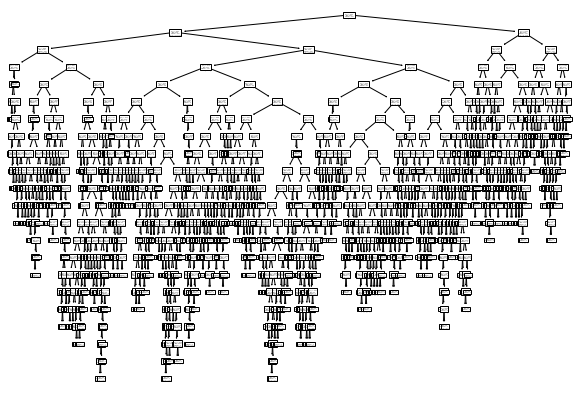

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

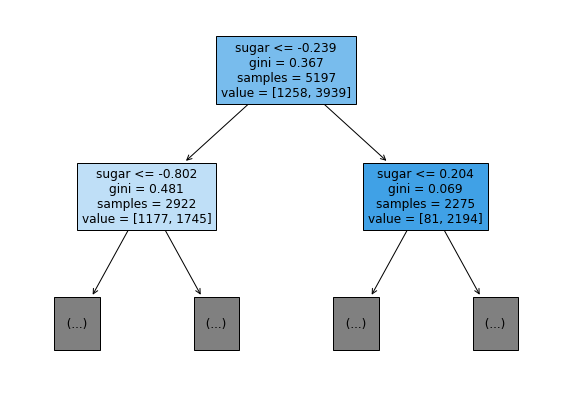

In [ ]:
# 노드가 어떤 특성으로 나뉘는지 확인하기 위해 트리의 깊이를 제한해서 출력
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

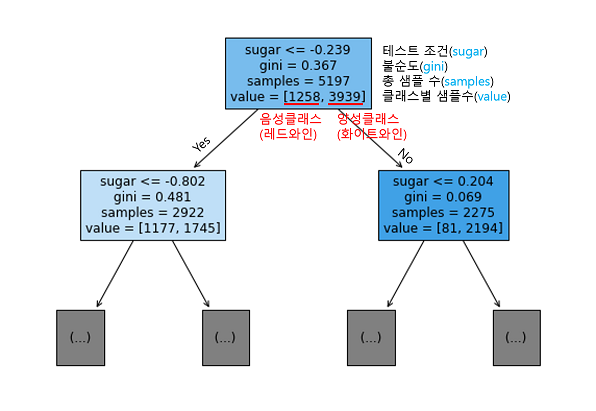

> ### 지니 불순도 (gini impurity)
> $$ gini = 1 - (음성클래스비율^{2} + 양성클래스비율^{2}) $$
>
> * 100개의 샘플이 있는 어떤 노드의 두 클래스 비율이 정확히 1/2 이면?
>
> $$ 1 - ((50/100)^{2} + 50/100)^{2}) = 0.5 $$
>
> * 노드에 하나의 클래스만 있다면?  
>
> $$ 1 - ((0/100)^{2} + (100/100)^{2}) = 0 $$


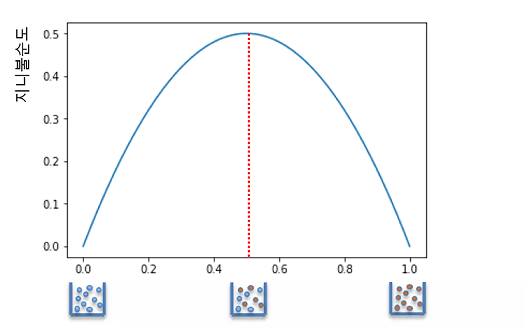

> ### 불순도의 차이
> $$ 불순도의 차이 = 부모의 불순도 - {(왼쪽노드 샘플수/부모샘플수) * 왼쪽노드 불순도} - {(오른쪽노드 샘플수/부모샘플수) * 오른쪽노드 불순도} $$
>
> * 불순도의 차이는 **정보이득**(information gain) 이라고 하며, 결정트리모델은 정보이득이 최대가 되는 방향으로 학습한다

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


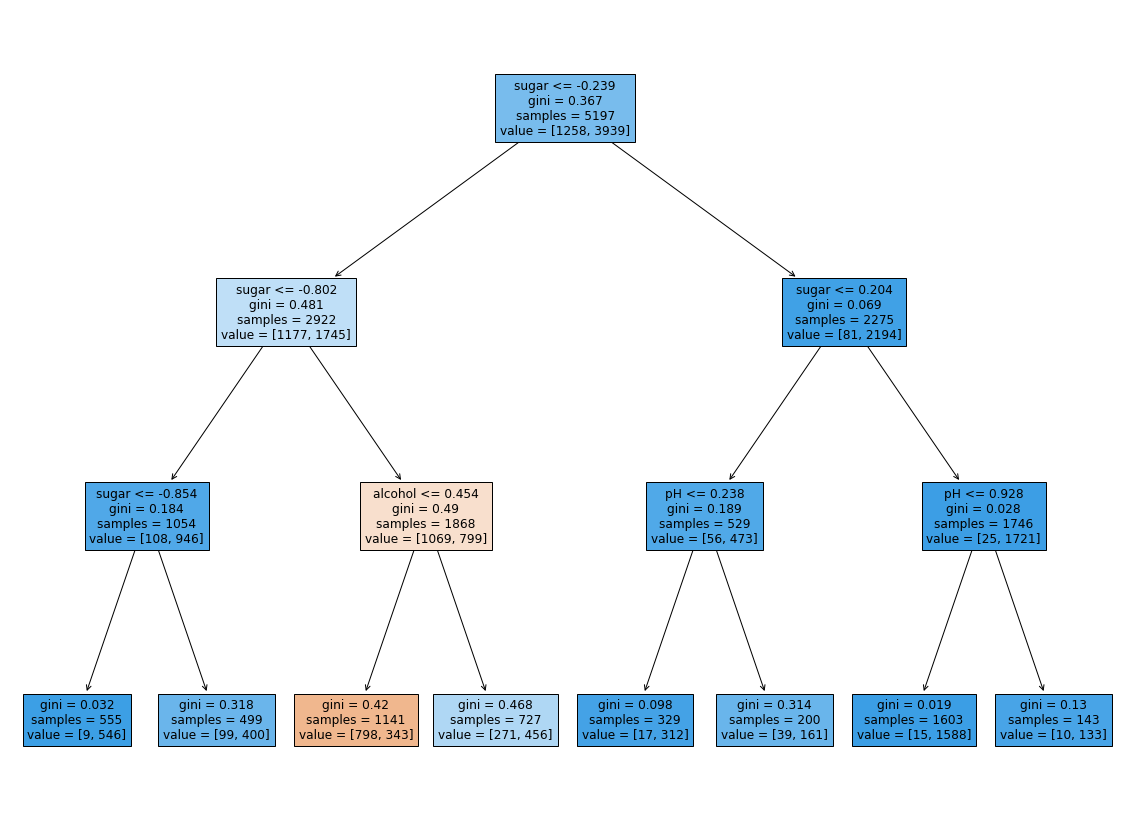

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


Text(0.5, 1.0, 'Feature importances in Decision Tree')

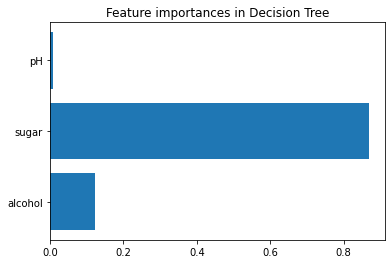

In [ ]:
important = dt.feature_importances_
name = ['alcohol', 'sugar', 'pH']
plt.barh(name, important)
plt.title('Feature importances in Decision Tree')

5-2. 교차 검증과 그리드 서치
==================
> 검증세트가 필요한 이유와 교차검증에 대해서 배워본다. 

> ### 검증세트
> * 테스트 세트를 사용하지 않고 모델의 성능을 파악하기 위해, 훈련세트를 나누어 **검증세트**(validation set)를 만들어 준다. 
> * 보통 데이터의 20~30%를 테스트세트, 검증세트로 사용한다. 

In [ ]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [ ]:
data = wine[['alcohol','sugar','pH']].to_numpy()
target = wine['class'].to_numpy()

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
# 훈련세트와 검증세트로 분리
sub_input, val_input, sub_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
print(sub_input.shape, val_input.shape)

(4157, 3) (1040, 3)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(sub_input, sub_target)
print(dt.score(sub_input, sub_target))
print(dt.score(val_input, val_target))

0.9971133028626413
0.864423076923077


> ### 교차 검증 (cross validation)
> * 안정적인 검증 점수를 얻고 훈련에 더 많은 데이터를 얻기 위해 **교차검증** 방법을 사용한다. 
> * k-fold 교차검증 : 훈련세트를 몇 개(k개) 부분으로 나누어 검증을 수행하는 방법 


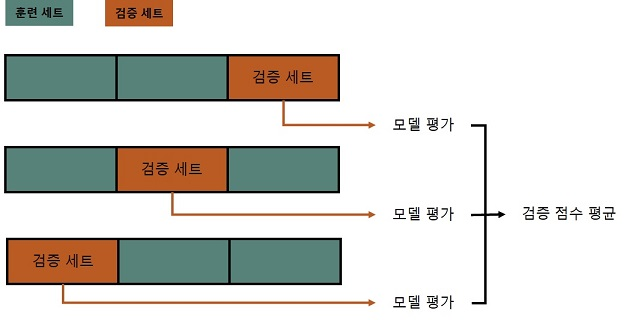

출처 : https://velog.io/@arittung/DeepLearningStudyDay10

In [ ]:
# cross_validate()라는 교차검증 함수 사용
from sklearn.model_selection import cross_validate
scores = cross_validate(dt, train_input, train_target)
print(scores)

{'fit_time': array([0.00933456, 0.00710225, 0.00742435, 0.00724506, 0.00696158]), 'score_time': array([0.00086522, 0.00074506, 0.00070763, 0.00075555, 0.00071454]), 'test_score': array([0.86923077, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}


In [ ]:
import numpy as np
print(np.mean(scores['test_score']))

0.855300214703487


> * cross_validate() 함수는 훈련세트를 섞지 않기 때문에, 훈련 세트를 섞으려면 분할기(splitter)를 지정해야 한다.
> * cross_validate() 함수는 회귀모델일 경우 **KFold** 분할기를 사용하고, 분류모델일 경우 **StratifiedKFold**를 사용한다. 

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, train_input, train_target, cv = StratifiedKFold())
print(np.mean(scores['test_score']))

0.855300214703487


In [ ]:
# 훈련세트를 섞어 검증을 수행할 경우
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, train_input, train_target, cv=splitter)
print(np.mean(scores['test_score']))

0.8574181117533719


> ### 하이퍼파라미터 튜닝
> * **모델 파라미터** : 머신러닝 모델이 학습하는 파라미터
> * **하이퍼파라미터** : 모델이 학습할 수 없어서 사용자가 지정해야만 하는 파라미터
> * 사이킷런의 GridSearchCV 클래스는 하이퍼파라미터 탐색과 교차검증을 한번에 수행한다. 따라서 cross_validate() 함수를 호출할 필요가 없다. 

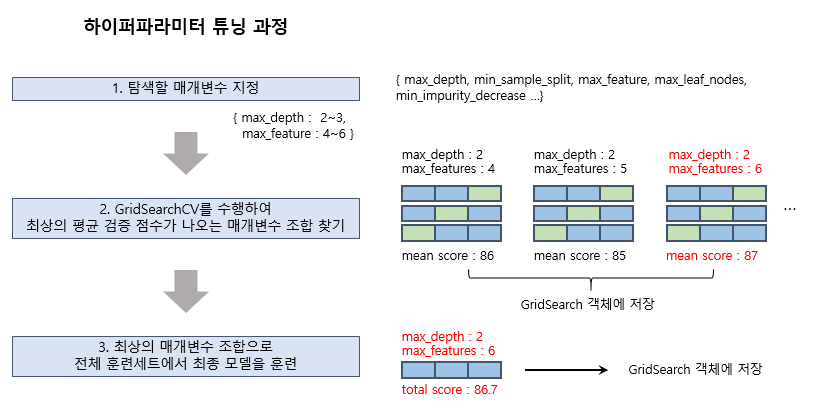

In [ ]:
params = {'min_impurity_decrease' : np.arange(0.0001, 0.001, 0.0001), 
          'max_depth' : range(5, 20, 1), 
          'min_samples_split' : range(2, 100, 10)}

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)    # n_jobs 매개변수는 병렬실행에 사용할 CPU 코어수 지정
gs.fit(train_input, train_target)
print(gs.best_params_)

{'max_depth': 14, 'min_impurity_decrease': 0.0004, 'min_samples_split': 12}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8683865773302731


> ### 랜덤 서치
> * 랜덤서치는 값의 목록을 전달받는 것이 아니라, 매개변수를 샘플링할 수 있는 확률 분포 객체를 전달받는다. 
> * scipy(수치계산 전용 라이브러리)의 stats 서브 패키지에 있는 uniform(실수값)과 randint(정수값) 클래스는 주어진 범위에서 고르게 값을 추출한다. 

In [ ]:
from scipy.stats import uniform, randint
params = {'min_impurity_decrease' : uniform(0.0001, 0.001),
          'max_depth' : randint(20, 50),
          'min_samples_split' : randint(2, 25),
          'min_samples_leaf' : randint(1, 25)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
gs = RandomizedSearchCV(DecisionTreeClassifier(random_state=42), params, n_iter=100, n_jobs=-1, random_state=42)  # n_iter는 샘플링횟수
gs.fit(train_input, train_target)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf3158d390>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf3158d290>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf3158d0d0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fbf3158dcd0>},
                   random_state=42)

In [ ]:
print(gs.best_params_)

{'max_depth': 39, 'min_impurity_decrease': 0.00034102546602601173, 'min_samples_leaf': 7, 'min_samples_split': 13}


In [ ]:
print(np.max(gs.cv_results_['mean_test_score']))

0.8695428296438884


In [ ]:
dt = gs.best_estimator_
print(dt.score(test_input, test_target))

0.86


5-3. 트리의 앙상블
==================
> 앙상블 학습이 무엇인지 이해하고 다양한 앙상블 학습 알고리즘 실습

> ### 정형 데이터와 비정형 데이터
> * **정형데이터**(structured data) : 데이터베이스의 정해진 규칙에 맞게 구조화 되어있는 데이터
> * **비정형데이터**(unstructured data) : 데이터베이스나 엑셀로 표현하기 어려운 텍스트, 사진, 음악과 같은 데이터
> * 정형데이터를 다루는데 가장 뛰어난 성과를 내는 알고리즘이 **앙상블 학습**

> ### 랜덤 포레스트(Random Forest)
> * 랜덤포레스트는 데이터를 랜덤하게 중복추출하여 훈련데이터를 만든다. 이렇게 만들어진 샘플을 부트스트랩 샘플(bootstrap sample)이라고 부른다. 
> * 부트스트랩 샘플은 훈련세트의 크기와 같게 만든다. 
> * 노드를 분할할 때, 전체 특성 중에서 일부 특성을 무작위로 고른다음 최선의 분할을 찾는다. 
> * 랜덤포레스트는 기본적으로 100개의 결정트리를 위의 방식으로 훈련한다. 
> * 랜덤하게 선택한 샘플과 특성으로 인해 훈련세트에 과대적합되는 것을 막아주고 안정적인 성능을 얻게 해준다. 

In [ ]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9973541965122431 0.8905151032797809


Text(0.5, 1.0, 'Feature importances in Random Forest')

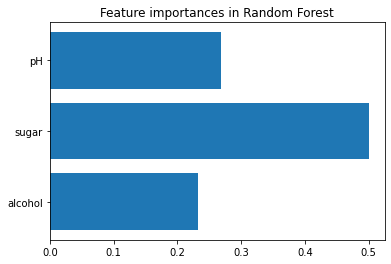

In [ ]:
rf.fit(train_input, train_target)
r_important = rf.feature_importances_
name = ['alcohol', 'sugar', 'pH']
plt.barh(name, r_important)
plt.title('Feature importances in Random Forest')

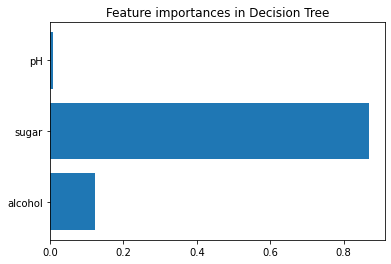

> * 부트스트랩 샘플에 포함되지 않고 남는 샘플을 Out of bag (OOB) 샘플이라고 한다. 
> * 랜덤포레스트는 이러한 OOB 샘플로, 훈련된 결정트리를 평가할 수 있다. 결과적으로 훈련세트에 더 많은 샘플을 사용할 수 있게 된다.  

In [ ]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)
rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8934000384837406


> ### 엑스트라 트리(Extra Trees) 
> * 랜덤포레스트와 동작 방식은 유사하지만, 엑스트라 트리는 부트스트랩 샘플을 사용하지 않는다.
> * 결정트리를 만들 때 전체 훈련세트를 사용하며, 노드를 분할할 때 가장 좋은 분할을 찾는것이 아니라 무작위로 분할한다. 
> * 무작위 분할로 인해 성능은 낮아지지만, 많은 트리를 훈련하기 때문에 과대적합을 맞고 검증세트의 점수를 높이는 경향이 있다. 

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9974503966084433 0.8887848893166506


Text(0.5, 1.0, 'Feature importances in Extra Trees')

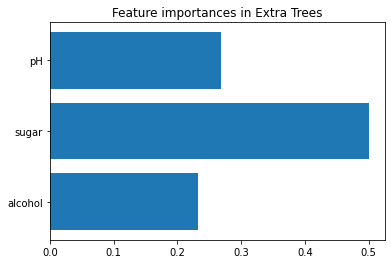

In [ ]:
et.fit(train_input, train_target)
e_important = rf.feature_importances_
name = ['alcohol', 'sugar', 'pH']
plt.barh(name, e_important)
plt.title('Feature importances in Extra Trees')

> ### 그레이디언트 부스팅(gradient boosting)
> * 깊이가 얕은 결정트리를 사용 -> 과대적합에 강하고 높은 일반화 성능을 기대할 수 있음
> * 이전 트리의 오차를 보완하여 새로운 결정트리를 만들어내는 방식으로 앙상블 
> * 경사 하강법을 사용하여 결정트리를 추가하며, 얕은 결정트리를 계속 추가하면서 가장 낮은 곳을 찾아 이동함

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8881086892152563 0.8720430147331015


In [ ]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']),np.mean(scores['test_score']))

0.9464595437171814 0.8780082549788999


Text(0.5, 1.0, 'Feature importances in Gradient Boost')

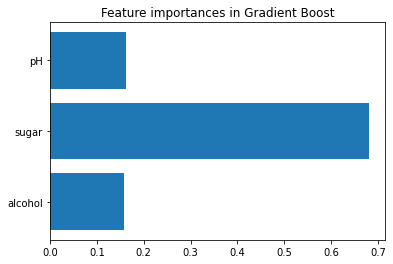

In [ ]:
gb.fit(train_input, train_target)
gb_important = gb.feature_importances_
name = ['alcohol', 'sugar', 'pH']
plt.barh(name, gb_important)
plt.title('Feature importances in Gradient Boost')

> ### 히스토그램 기반 그레이디언트 부스팅

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9321723946453317 0.8801241948619236


Text(0.5, 1.0, 'Feature importances in Histogram-based Gradient Boost')

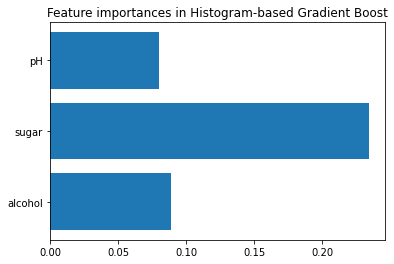

In [ ]:
# 훈련세트에서 특성중요도 계산
from sklearn.inspection import permutation_importance
hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10, random_state=42, n_jobs=-1)
hgb_important = result.importances_mean
plt.barh(name, hgb_important)
plt.title('Feature importances in Histogram-based Gradient Boost')

Text(0.5, 1.0, 'Feature importances in Histogram-based Gradient Boost')

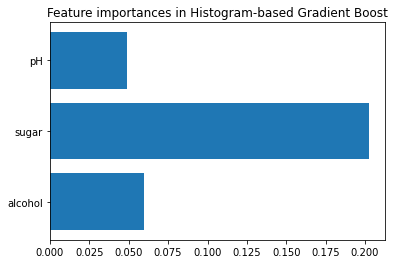

In [ ]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10, random_state=42, n_jobs=-1)
hgbt_important = result.importances_mean
plt.barh(name, hgbt_important)
plt.title('Feature importances in Histogram-based Gradient Boost')

> ### XGBoost, LightGBM

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(tree_method='hist', random_state=42)
scores = cross_validate(xgb, train_input, train_target, return_train_score=True)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8824322471423747 0.8726214185237284


In [ ]:
from lightgbm import LGBMClassifier
lgb = LGBMClassifier(random_state=42)
scores = cross_validate(lgb, train_input, train_target, return_train_score=True, n_jobs=-1)
print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9338079582727165 0.8789710890649293
